In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.integrate import quad
from math import sqrt,pow,log
import pandas as pd
from matplotlib.pyplot import figure
plt.style.use('/root/Github_Repos/HubbleConstant-ConstraintsForVCG/standard.mplstyle')

In [2]:
np.random.seed(99)
a=np.random.rand(3,3)
print(a)
print(a[2,1])
print(a[0:2,1])

[[0.67227856 0.4880784  0.82549517]
 [0.03144639 0.80804996 0.56561742]
 [0.2976225  0.04669572 0.9906274 ]]
0.04669572050695325
[0.4880784  0.80804996]


Importing data

In [3]:
!wget http://supernova.lbl.gov/Union/figures/SCPUnion2.1_mu_vs_z.txt
d = np.genfromtxt('SCPUnion2.1_mu_vs_z.txt')
z = d.T[1]
dm = d.T[2]
errdm= d.T[3]
dlabel = 'SCP_2.1'
label = {"Z_SN":z,"DMdata_SN":dm,"Error_DM_SN":errdm}
data_SN=pd.DataFrame(label)
print(data_SN)
len(z)

URL transformed to HTTPS due to an HSTS policy
--2022-01-30 20:04:09--  https://supernova.lbl.gov/Union/figures/SCPUnion2.1_mu_vs_z.txt
Resolving supernova.lbl.gov (supernova.lbl.gov)... 128.3.28.88
Connecting to supernova.lbl.gov (supernova.lbl.gov)|128.3.28.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33899 (33K) [text/plain]
Saving to: ‘SCPUnion2.1_mu_vs_z.txt.21’

SCPUnion2.1_mu_vs_z 100%[===================>]  33.10K   108KB/s    in 0.3s    

2022-01-30 20:04:10 (108 KB/s) - ‘SCPUnion2.1_mu_vs_z.txt.21’ saved [33899/33899]

         Z_SN  DMdata_SN  Error_DM_SN
0    0.028488  35.346583     0.223906
1    0.050043  36.682368     0.166829
2    0.052926  36.817691     0.155756
3    0.070086  37.446737     0.158467
4    0.062668  37.483409     0.156099
..        ...        ...          ...
575  1.017000  44.293971     0.171046
576  1.315000  44.971358     0.187509
577  0.821000  43.640939     0.194014
578  1.215000  45.246521     0.560317
579  0.623000  

580

PARAMETER Definition (Hubble Parameter, Energy density of Radiation (r0) and Baryonic Matter (b0), in the current epoch)

In [4]:
def defineparam():
  global H0
  H0 = float(input("H0: "))
  global omega_r0
  omega_r0 = float(input("Omega R0: "))
  global omega_b0
  omega_b0 = float(input("Omega B0: "))
defineparam()

H0: 69.8
Omega R0: .02
Omega B0: .0000245


Friedmann equation: $H^2=\Omega_{ch0} H_0^2 (1+z)^4 X^2(z)$ where $X^{2}(z)=\frac{\Omega_{r 0}}{1-\Omega_{r 0}-\Omega_{b 0}}+\frac{\Omega_{b 0} }{1-\Omega_{r 0}-\Omega_{\theta 0}(1+z)}+\frac{\left(\Omega_{m}(1+z)^6+(1-\Omega_{m})(1+z)^n\right)^{1 / 2}}{(1+z)^4}$  

In [5]:
#Defining part which comes inside integeration of distance Luminosity
def int_func(redshift):
      return 1/((pow((1+redshift),2)*(omega_r0+(omega_b0/(1+redshift))+((1-omega_b0-omega_r0)*((omega_m*(1+redshift)**6)+(1-omega_m)*(1+redshift)**n)**(0.5)/(1+redshift)**(4)))**(0.5)))

Calculating the luminosity distance by $d_l = \frac{c(1+z)}{H0} \int_{0}^{z} \frac{dz}{(1+z)^2X(z)}$

In [10]:
dmthSN= np.zeros(len(z))
dlthSN = np.zeros(len(z))
dldataSN=np.zeros(len(z))
error= np.zeros(len(z))
dlerror= np.zeros(len(z))
omega_m=0.22
n=-0.73
a=b=c=d=e=0
# DL theoretical from VCG model
for redshift in data_SN.Z_SN:
  g = quad(int_func,0,redshift)
  dlthSN[a]+=(1+redshift)*g[0]*(300000/(H0))
  a=a+1
# DM from DL theoretical model VCG
for i in dlthSN:
  dmthSN[b]+=5*log(i,10)+25
  b=b+1
# Distance luminosity from data in Mpc
for i in data_SN.DMdata_SN:
  dldataSN[c]+=10**((i/5)+1)/1000000
  c=c+1
# Calculating error bars of DL

for (i,j) in zip(dm,errdm):   
  error[d]+= 10**((i+j)/5+1)/10**6
  d+=1
for (i,j) in zip(dldataSN,error):
    dlerror[e]+=j-i
    e+=1
data_SN["DMth_SN"]=dmthSN
data_SN["dLth_SN"] = dlthSN
data_SN["dLdata_SN"] = dldataSN
data_SN["Error_DL_SN"] = dlerror
%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


The Table has the Distance Modulus observed (DM) and the Distance Modulus calculated by Chaplygin Model 

In [11]:
print(data_SN)

         Z_SN  DMdata_SN  Error_DM_SN    DMth_SN      dLth_SN     dLdata_SN  \
0    0.028488  35.346583     0.223906  35.493179   125.497721    117.305042   
1    0.050043  36.682368     0.166829  36.755277   224.416808    217.006920   
2    0.052926  36.817691     0.155756  36.881964   237.899104    230.960787   
3    0.070086  37.446737     0.158467  37.521324   319.348486    308.565458   
4    0.062668  37.483409     0.156099  37.265740   283.888677    313.820905   
..        ...        ...          ...        ...          ...           ...   
575  1.017000  44.293971     0.171046  44.081684  6551.441898   7224.273081   
576  1.315000  44.971358     0.187509  44.729498  8828.758313   9868.963776   
577  0.821000  43.640939     0.194014  43.539609  5104.131408   5347.955161   
578  1.215000  45.246521     0.560317  44.530474  8055.542885  11202.222383   
579  0.623000  42.514524     0.241428  42.838654  3695.989972   3183.499599   

     Error_DL_SN  
0      12.741218  
1      17.329

In [12]:
sort_data_SN=data_SN.sort_values(by=['Z_SN'])
sort_data_SN

,Z_SN,DMdata_SN,Error_DM_SN,DMth_SN,dLth_SN,dLdata_SN,Error_DL_SN
50,0.015000,34.163504,0.161453,34.075322,65.322745,68.030048,5.250946
148,0.015000,34.111411,0.213389,34.075322,65.322745,66.417449,6.858249
132,0.015000,34.379773,0.217349,34.075322,65.322745,75.154426,7.911760
159,0.015027,33.950192,0.178117,34.079284,65.442042,61.664938,5.271362
139,0.015100,34.525875,0.213682,34.089938,65.763913,80.385008,8.312515
...,...,...,...,...,...,...,...
557,1.340000,45.067506,0.275015,44.776840,9023.354301,10315.757309,1392.820190
570,1.350000,44.827065,0.185705,44.795525,9101.332131,9234.493829,824.491572
533,1.370000,45.049713,0.262748,44.832474,9257.523347,10231.579187,1316.037508
537,1.390000,44.876234,0.250632,44.868877,9414.024553,9445.976658,1155.668427


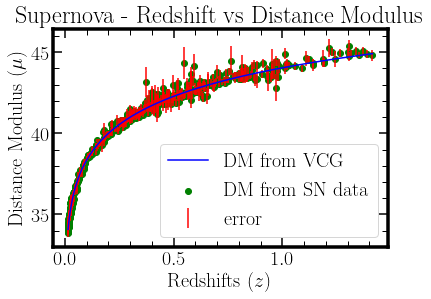

In [13]:
plt.xlabel("Redshifts ($z$)")
plt.ylabel("Distance Modulus ($\mu$)")
plt.title("Supernova - Redshift vs Distance Modulus")
plt.scatter(sort_data_SN.Z_SN,sort_data_SN.DMdata_SN,color='green',label='DM from SN data')
plt.plot(sort_data_SN.Z_SN,sort_data_SN.DMth_SN,color='blue',label='DM from VCG')
plt.errorbar(sort_data_SN.Z_SN,sort_data_SN.DMdata_SN,yerr=sort_data_SN.Error_DM_SN,fmt=' ',ecolor='red', label='error')
plt.legend(loc='best')
plt.show()

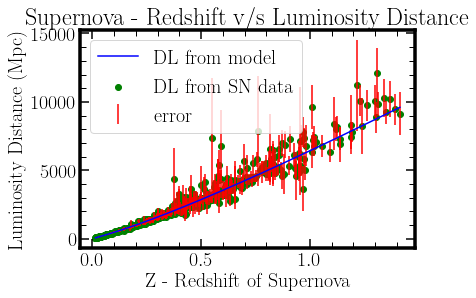

In [14]:
plt.errorbar(sort_data_SN.Z_SN,sort_data_SN.dLdata_SN,yerr=sort_data_SN.Error_DL_SN,fmt=' ',ecolor='red', label='error')
plt.plot(sort_data_SN.Z_SN,sort_data_SN.dLth_SN,color='blue', label='DL from model')
plt.scatter(sort_data_SN.Z_SN,sort_data_SN.dLdata_SN,color='green', label='DL from SN data')
plt.xlabel("Z - Redshift of Supernova")
plt.ylabel("Luminosity Distance (Mpc)")
plt.title("Supernova - Redshift v/s Luminosity Distance")
plt.legend(loc='best')
plt.show()

In [10]:
name=np.array(['GW190521','GW190706_222641','GW190413_134308','GW190514_065416','GW190719_215514','GW190521',"GW190909_114149","GW190413_052954",'GW190803_022701','GW190731_140936','GW190727_060333','GW190620_030421','GW190421_213856','GW170729','GW190602_175927','GW190527_092055','GW190519_153544','GW190424_180648','GW190929_012149','GW190828_063405','GW190701_203306','GW190513_205428','GW170823','GW190517_055101','GW190915_235702','GW190828_065509','GW190408_181802','GW190910_112807','GW190512_180714','GW190503_185404','GW190521_074359','GW170818','GW151012','GW170809','GW170104','GW190728_064510','GW190708_232457','GW190630_185205','GW190720_000836','GW190707_093326','GW190930_133541','GW190412','GW190924_021846','GW170814','GW151226','GW150914','GW190426_152155','GW200115_042309','GW170608','GW200105_162426','GW190814','GW190425','GW170817'])
full_DL_GW=np.array([[5300.0,2400,-2600],[4420.0,2590,-1930],[4450,2480,-2120],[4130.0,2650,-2170],[3940.0,2590,-2000],[3920.0,2190,-1950],[3770.0,3270,-2220],[3550.0,2270,-1660],[3270.0,1950,-1580],[3300.0,2390,-1720],[3300.0,1540,-1500],[2810.0,1680,-1310],[2880.0,1370,-1380],[2840.0,1400,-1360],[2690.0,1790,-1120],[2490.0,2480,-1240],[2530.0,1830,-920],[2200.0,1580,-1160],[2130.0,3650,-1050],[2130.0,660,-930],[2060.0,760,-730],[2060.0,880,-800],[1940.0,970,-900],[1860.0,1620,-840],[1620.0,710,-610],[1600.0,620,-600],[1550.0,400,-600],[1460.0,1030,-580],[1430.0,550,-550],[1450.0,690,-630],[1240.0,400,-570],[1060.0,420,-380],[1080.0,550,-490],[1030.0,320,-390],[990.0,440,-430],[870.0,260,-370],[880.0,330,-390],[890.0,560,-370],[790.0,690,-320],[770.0,380,-370],[760.0,360,-320],[740.0,140,-170],[570.0,220,-220],[600.0,150,-220],[450.0,180,-190],[440.0,150,-170],[370.0,180,-160],[300.0,150,-100],[320.0,120,-110],[280.0,110,-110],[241.0,41,-45],[159.0,69,-72],[40.0,7,-15]])
full_Z_GW=np.array([[0.82,0.28,-0.34],[0.71,0.32,-0.27],[0.71,0.31,-0.30],[0.67,0.33,-0.31],[0.64,0.33,-0.29],[0.64,0.28,-0.28],[0.62,0.41,-0.33],[0.59,0.29,-0.24],[0.55,0.26,-0.24],[0.55,0.31,-0.26],[0.55,0.21,-0.22],[0.49,0.23,-0.20],[0.49,0.19,-0.21],[0.49,0.19,-0.21],[0.47,0.25,-0.17],[0.44,0.34,-0.20],[0.44,0.25,-0.14],[0.39,0.23,-0.19],[0.38,0.49,-0.17],[0.38,0.10,-0.15],[0.37,0.11,-0.12],[0.37,0.13,-0.13],[0.35,0.15,-0.15],[0.34,0.24,-0.14],[0.3,0.11,-0.10],[0.3,0.10,-0.10],[0.29,0.06,-0.10],[0.28,0.16,-0.10],[0.27,0.09,-0.10],[0.27,0.11,-0.11],[0.24,0.07,-0.10],[0.21,0.07,-0.07],[0.21,0.09,-0.09],[0.2,0.05,-0.07],[0.2,0.08,-0.08],[0.18,0.05,-0.07],[0.18,0.06,-0.07],[0.18,0.10,-0.07],[0.16,0.12,-0.06],[0.16,0.07,-0.07],[0.15,0.06,-0.06],[0.15,0.03,-0.03],[0.12,0.04,-0.04],[0.12,0.03,-0.04],[0.09,0.04,-0.04],[0.09,0.03,-0.03],[0.08,0.04,-0.03],[0.07,0.03,-0.02],[0.07,0.02,-0.02],[0.06,0.02,-0.02],[0.053,0.009,-0.010],[0.04,0.01,-0.02],[0.01,0.00,-0.00]])
# Number of events
a=name.size
H0=69.8
#Defining arrays
dldata_GW=np.zeros(a)
dlUP=np.zeros(a)
dlLOW=np.zeros(a)
dlTOP=np.zeros(a)
dlBOTTOM=np.zeros(a)
dmtop=np.zeros(a)
dmbottom=np.zeros(a)
Z_GW=np.zeros(a)
dmth_GW=np.zeros(a)
dmdata_GW=np.zeros(a)
dlth_GW = np.zeros(a)
dmtoperr=np.zeros(a)
dmbottomerr=np.zeros(a)
#defining variables for index of the above arrays
b=c=d=e=f=h=k=l=m=x=y=p=q=r=s=0
#extracting redshifts and DL from the full data
for i in full_Z_GW:
  Z_GW[e]+=i[0]
  e+=1
for i in full_DL_GW:
  dldata_GW[b]+=i[0]
  b+=1
#Upper and Lower limit of DL from data
for i in full_DL_GW:
  dlUP[c]+=i[0]+i[1]
  c+=1
for i in full_DL_GW:
  dlLOW[d]+=i[0]+i[2]
  d+=1
# Calculating upper and lower limit of Distance modulus from DL limits calculated above
for i in dlUP:
  dmtop[f]+=5*log(i,10)+25
  f+=1
for i in dlLOW:
  dmbottom[k]+=5*log(i,10)+25
  k+=1
#Calculating DM from DL given in data
for i in dldata_GW:
  dmdata_GW[h]+=5*log(i,10)+25
  h+=1
#Calculating differences in DL from its limits
for (i,j) in zip(dldata_GW,dlUP):
  dlTOP[x]+=j-i
  x+=1
for (i,j) in zip(dldata_GW,dlLOW):
  dlBOTTOM[y]=i-j
  y+=1
#upper and lower differences for errors
for (i,j) in zip(dmdata_GW,dmtop):
  dmtoperr[r]+=j-i
  r+=1
for (i,j) in zip(dmdata_GW,dmbottom):
  dmbottomerr[s]+=i-j
  s+=1
omega_m=.09
n=1.4545
# Calculating theoretical value of DL and DM from the model VCG
for redshift in Z_GW:
  g=quad(int_func,0,redshift)
  dlth_GW[l]+=(1+redshift)*g[0]*(300000/(H0))  
  l+=1
for i in dlth_GW:
  dmth_GW[m]+=5*log(i,10)+25
  m+=1
# DL-h1 < DL < DL+h2,if h1<h2, take error to be h1 or vice versa
#new_error=np.zeros(a)
#for (i,j) in zip(dlTOP,dlBOTTOM):
 # if i<j:
#    new_error[p]+=i
#    p+=1
#  elif j<i:
#    new_error[q]+=j
 #   q+=1

new_error=np.zeros(a)
for i in range (a):
  if dlTOP[i]> dlBOTTOM[i]:
    new_error[p]+=dlTOP[i]
  elif dlTOP[i]< dlBOTTOM[i]:
    new_error[p]+= dlBOTTOM[i]
  else:
    new_error[p]+=dlTOP[i]
  p+=1  
#for (i,j) in zip(dmtoperr,dmbottomerr):
#  if i<j:
 #  new_error[p]+=i
  # p+=1
#  elif j<i:
 #  new_error[q]+=j
  # q+=1

label1 = {"Event_Name":name,"Z_GW":Z_GW,"dLdata_GW":dldata_GW,"DMdata_GW": dmdata_GW,"dLth_GW":dlth_GW, "DMth_GW": dmth_GW,"DL_Uplimit": dlUP, "DL_Lowlimit": dlLOW,"DL_UP_Error":dlTOP,"DL_LOW_Error":dlBOTTOM,  "DM_UpError": dmtoperr, "DM_LowError":dmbottomerr, "Error_DM_GW":new_error}
data_GW=pd.DataFrame(label1)
#data_GW.to_excel(excel_writer = "/root/Github_Repos/VCG_GW/GWTColdGW.xlsx")

In [11]:
print(data_GW)

         Event_Name   Z_GW  dLdata_GW  DMdata_GW      dLth_GW    DMth_GW  \
0          GW190521  0.820     5300.0  43.621379  5233.836220  43.594101   
1   GW190706_222641  0.710     4420.0  43.227111  4379.331490  43.207039   
2   GW190413_134308  0.710     4450.0  43.241800  4379.331490  43.207039   
3   GW190514_065416  0.670     4130.0  43.079750  4077.269680  43.051847   
4   GW190719_215514  0.640     3940.0  42.977481  3854.001782  42.929560   
5          GW190521  0.640     3920.0  42.966430  3854.001782  42.929560   
6   GW190909_114149  0.620     3770.0  42.881707  3706.779739  42.844984   
7   GW190413_052954  0.590     3550.0  42.751142  3488.467146  42.713173   
8   GW190803_022701  0.550     3270.0  42.572739  3202.274289  42.527293   
9   GW190731_140936  0.550     3300.0  42.592570  3202.274289  42.527293   
10  GW190727_060333  0.550     3300.0  42.592570  3202.274289  42.527293   
11  GW190620_030421  0.490     2810.0  42.243532  2784.061282  42.223394   
12  GW190421

In [12]:
sort_data_GW=data_GW.sort_values(by=['Z_GW'])
sort_data_GW

,Event_Name,Z_GW,dLdata_GW,DMdata_GW,dLth_GW,DMth_GW,DL_Uplimit,DL_Lowlimit,DL_UP_Error,DL_LOW_Error,DM_UpError,DM_LowError,Error_DM_GW
52,GW170817,0.010,40.0,33.010300,43.304313,33.182656,47.0,25.0,7.0,15.0,0.350189,1.020600,15.0
51,GW190425,0.040,159.0,36.006986,177.068552,36.240707,228.0,87.0,69.0,72.0,0.782689,1.309389,72.0
50,GW190814,0.053,241.0,36.910085,236.801644,36.871924,282.0,196.0,41.0,45.0,0.341160,0.448805,45.0
49,GW200105_162426,0.060,280.0,37.235790,269.402514,37.152008,390.0,170.0,110.0,110.0,0.719533,1.083546,110.0
48,GW170608,0.070,320.0,37.525750,316.501286,37.501877,440.0,210.0,120.0,110.0,0.691513,0.914653,120.0
47,GW200115_042309,0.070,300.0,37.385606,316.501286,37.501877,450.0,200.0,150.0,100.0,0.880456,0.880456,150.0
46,GW190426_152155,0.080,370.0,37.841009,364.214311,37.806785,550.0,210.0,180.0,160.0,0.860805,1.229912,180.0
45,GW150914,0.090,440.0,38.217263,412.536366,38.077311,590.0,270.0,150.0,170.0,0.636997,1.060445,170.0
44,GW151226,0.090,450.0,38.266063,412.536366,38.077311,630.0,260.0,180.0,190.0,0.730640,1.191196,190.0
43,GW170814,0.120,600.0,38.890756,561.104323,38.745218,750.0,380.0,150.0,220.0,0.484550,0.991838,220.0


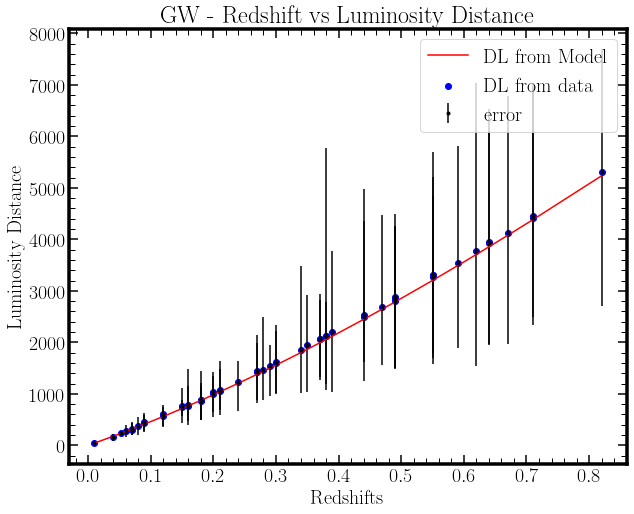

In [13]:
plt.errorbar(sort_data_GW.Z_GW,sort_data_GW.dLdata_GW,yerr=(sort_data_GW.DL_LOW_Error,sort_data_GW.DL_UP_Error),fmt='.k',ecolor='black', label='error')
plt.scatter(sort_data_GW.Z_GW,sort_data_GW.dLdata_GW,color='blue',label='DL from data',marker='o')
plt.plot(sort_data_GW.Z_GW,sort_data_GW.dLth_GW,color="red",label='DL from Model')
plt.xlabel('Redshifts')
plt.ylabel('Luminosity Distance')
plt.title('GW - Redshift vs Luminosity Distance')
plt.legend(loc='best')
plt.show()

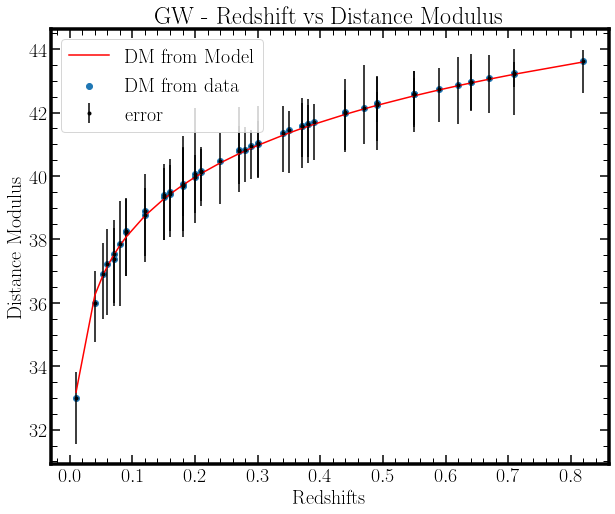

In [14]:
plt.errorbar(sort_data_GW.Z_GW,sort_data_GW.DMdata_GW,yerr=(dmbottomerr,dmtoperr),fmt='.k',ecolor='black', label='error')
plt.scatter(sort_data_GW.Z_GW,sort_data_GW.DMdata_GW,label='DM from data',marker='o')
plt.plot(sort_data_GW.Z_GW,sort_data_GW.DMth_GW,color="red",label='DM from Model')
plt.xlabel('Redshifts')
plt.ylabel('Distance Modulus')
plt.title('GW - Redshift vs Distance Modulus')
plt.legend(loc='best')
plt.show()

In [ ]:
# Chi_square test considering only SN data points
chi_sq = []
collection=[]
col=[]
dlth_SN= np.zeros(len(z))
dmth_SN= np.zeros(len(z))
chi_sq=np.zeros(len(z))
a=0
b=0
  for omega_m in np.linspace(0.01,0.36,36): 
   for n in np.linspace(-10,4,441):
    for redshift in data_SN.Z_SN:
      g = quad(int_func,0,redshift)
      dl1=(1+redshift)*g[0]*(300000/H0)
      dlth_SN[b]+=dl1
      dmth_SN[a]+=5.*log(dl1,10)+25
      a+=1
      b+=1
      data_SN["DMchi"]=dmth_SN
    a=0
    b=0
    C2=0
    C1=0
    for i in data_SN.Error_DM_SN:
      C2+=1/np.power(i,2)
    data_SN["dC1"]=(data_SN["DMchi"]-data_SN["DMdata_SN"])/(data_SN["Error_DM_SN"]**2)
    for i in data_SN["dC1"]:
      C1+=i
    del data_SN["dC1"]
    chi_sq_part1 = 0
    data_SN["Part1"]=((data_SN["DMchi"]-data_SN["DMdata_SN"])/data_SN["Error_DM_SN"])**2
    for i in data_SN.Part1:
      chi_sq_part1+=i
    del data_SN["Part1"]
    chi_sq = chi_sq_part1+(C1/C2)*(C1+(2*log(10)/5))-(2*log(0.698))
    col.append(chi_sq)
    collection.append([chi_sq,omega_m,n,H0])
    dlth_SN = np.zeros(len(z))
    dmth_SN = np.zeros(len(z))
    del data_SN["DMchi"]
print(len(collection))
for i in collection:
  if i[0]==min(col):
    print(i)
%time

## Just for record as compiling takes around 25 minutes.
# Chi_square test considering only SN data points
chi_sq = []
collection=[]
col=[]
dlth_SN= np.zeros(len(z))
dmth_SN= np.zeros(len(z))
chi_sq=np.zeros(len(z))
a=0
b=0
for omega_m in np.linspace(0.01,0.36,36): 
  for n in np.linspace(-10,4,441):
    for redshift in data_SN.Z_SN:
      g = quad(int_func,0,redshift)
      dl1=(1+redshift)*g[0]*(300000/H0)
      dlth_SN[b]+=dl1
      dmth_SN[a]+=5.*log(dl1,10)+25
      a+=1
      b+=1
      data_SN["DMchi"]=dmth_SN
    a=0
    b=0
    C2=0
    C1=0
    for i in data_SN.Error_DM_SN:
      C2+=1/np.power(i,2)
    data_SN["dC1"]=(data_SN["DMchi"]-data_SN["DMdata_SN"])/(data_SN["Error_DM_SN"]**2)
    for i in data_SN["dC1"]:
      C1+=i
    del data_SN["dC1"]
    chi_sq_part1 = 0
    data_SN["Part1"]=((data_SN["DMchi"]-data_SN["DMdata_SN"])/data_SN["Error_DM_SN"])**2
    for i in data_SN.Part1:
      chi_sq_part1+=i
    del data_SN["Part1"]
    chi_sq = chi_sq_part1+(C1/C2)*(C1+(2*log(10)/5))-(2*log(0.698))
    col.append(chi_sq)
    collection.append([chi_sq,omega_m,n])
    dlth_SN = np.zeros(len(z))
    dmth_SN = np.zeros(len(z))
    del data_SN["DMchi"]
print(len(collection))
for i in collection:
  if i[0]==min(col):
    print(i)
%time

15876
[563.25090425986, 0.09, 1.4545454545454533]
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs

In [15]:
# Chi_square test considering only GW data points
chi_sq = []
collection=[]
col=[]
x=name.size
dlth_GW= np.zeros(x)
dmth_GW= np.zeros(x)
chi_sq=np.zeros(x)
a=0
b=0
for omega_m in np.linspace(0.01,0.36,36): 
  for n in np.linspace(-10,4,441):
    for redshift in data_GW.Z_GW:
      g = quad(int_func,0,redshift)
      dl1=(1+redshift)*g[0]*(300000/H0)
      dlth_GW[b]+=dl1
      dmth_GW[a]+=5.*log(dl1,10)+25
      a+=1
      b+=1
      data_GW["DLchi"]=dlth_GW
    a=0
    b=0
    C2=0
    C1=0
    for i in new_error:
      C2+=1/np.power(i,2)
    data_GW["dC1"]=(data_GW["DLchi"]-data_GW["dLdata_GW"])/(new_error**2)
    for i in data_GW["dC1"]:
      C1+=i
    del data_GW["dC1"]
    chi_sq_part1 = 0
    data_GW["Part1"]=((data_GW["DLchi"]-data_GW["dLdata_GW"])/new_error)**2
    for i in data_GW.Part1:
      chi_sq_part1+=i
    del data_GW["Part1"]
    chi_sq = chi_sq_part1+(C1/C2)*(C1+(2*log(10)/5))-(2*log(0.698))
    col.append(chi_sq)
    collection.append([chi_sq,omega_m,n])
    dlth_GW = np.zeros(x)
    dmth_GW = np.zeros(x)
    del data_GW["DLchi"]
print(len(collection))
for i in collection:
  if i[0]==min(col):
    print(i)
%time

15876
[2.107124599799133, 0.01, 3.459090909090907]
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


For different new_errors
15876
[0.874171082464373, 0.21000000000000002, -1.40909090909091]
CPU times: user 9 µs, sys: 0 ns, total: 9 µs
Wall time: 13.6 µs

## Just for record as compiling takes around 15 minutes.
# Chi_square test considering only GW data points
chi_sq = []
collection=[]
col=[]
x=name.size
dlth_GW= np.zeros(x)
dmth_GW= np.zeros(x)
chi_sq=np.zeros(x)
a=0
b=0
for omega_m in np.linspace(0.01,0.36,36): 
  for n in np.linspace(-10,4,441):
    for redshift in data_GW.Z_GW:
      g = quad(int_func,0,redshift)
      dl1=(1+redshift)*g[0]*(300000/H0)
      dlth_GW[b]+=dl1
      dmth_GW[a]+=5.*log(dl1,10)+25
      a+=1
      b+=1
      data_GW["DMchi"]=dmth_GW
    a=0
    b=0
    C2=0
    C1=0
    for i in new_error:
      C2+=1/np.power(i,2)
    data_GW["dC1"]=(data_GW["DMchi"]-data_GW["DMdata_GW"])/(new_error**2)
    for i in data_GW["dC1"]:
      C1+=i
    del data_GW["dC1"]
    chi_sq_part1 = 0
    data_GW["Part1"]=((data_GW["DMchi"]-data_GW["DMdata_GW"])/new_error)**2
    for i in data_GW.Part1:
      chi_sq_part1+=i
    del data_GW["Part1"]
    chi_sq = chi_sq_part1+(C1/C2)*(C1+(2*log(10)/5))-(2*log(0.698))
    col.append(chi_sq)
    collection.append([chi_sq,omega_m,n])
    dlth_GW = np.zeros(x)
    dmth_GW = np.zeros(x)
    del data_GW["DMchi"]
print(len(collection))
for i in collection:
  if i[0]==min(col):
    print(i)
%time
15876
[1.2917242726728873, 0.21000000000000002, -1.4409090909090914]
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.44 µs